#Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sb
import string
import warnings

In [3]:
#Importing CSV files
dataset=pd.read_csv('D:\\sasi\\New folder (2)\\fake_job_postings.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
job_id                 17880 non-null int64
title                  17880 non-null object
location               17534 non-null object
department             6333 non-null object
salary_range           2868 non-null object
company_profile        14572 non-null object
description            17879 non-null object
requirements           15185 non-null object
benefits               10670 non-null object
telecommuting          17880 non-null int64
has_company_logo       17880 non-null int64
has_questions          17880 non-null int64
employment_type        14409 non-null object
required_experience    10830 non-null object
required_education     9775 non-null object
industry               12977 non-null object
function               11425 non-null object
fraudulent             17880 non-null int64
dtypes: int64(5), object(13)
memory usage: 2.5+ MB


In [4]:
dataset.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
dataset.isnull().sum().sort_values(ascending=False)
dataset.isna().sum().sort_values(ascending=False)


salary_range           15012
department             11547
required_education      8105
benefits                7210
required_experience     7050
function                6455
industry                4903
employment_type         3471
company_profile         3308
requirements            2695
location                 346
description                1
title                      0
fraudulent                 0
telecommuting              0
has_company_logo           0
has_questions              0
job_id                     0
dtype: int64

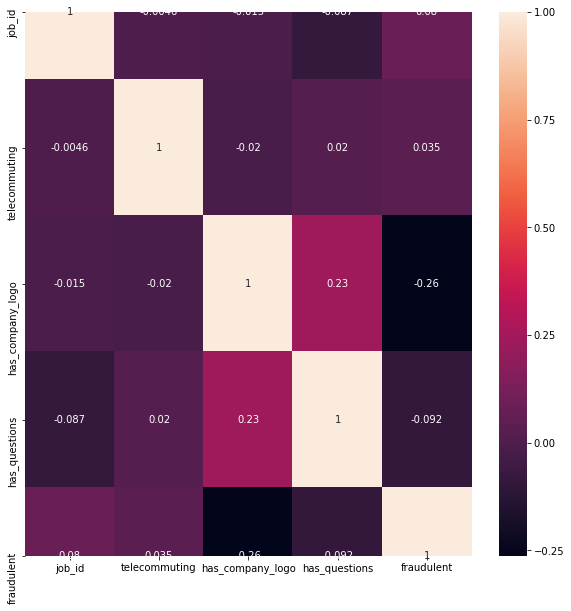

In [6]:
#  correlation matrix
fig = plt.figure(figsize = (10,10))
sb.heatmap(dataset.corr(),annot=True)

C:\Users\sasim\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A3D1F7D748>,
      dtype=object)

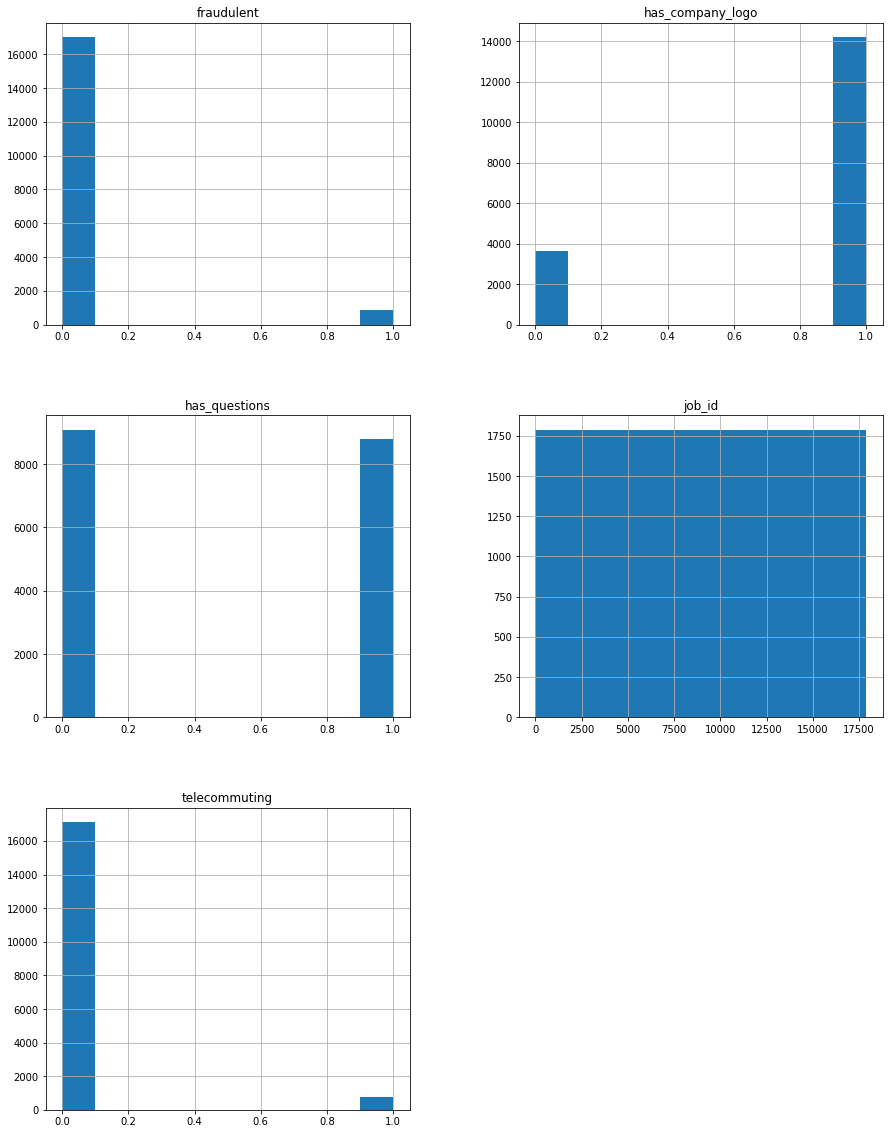

In [7]:
# checking distributions using histograms
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dataset.hist(ax = ax)

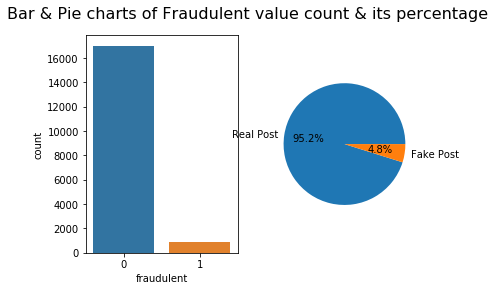

In [12]:
#countplot & Pie chart for fraudulent
fig, ax = plt.subplots(1, 2)
sb.countplot(x='fraudulent', data=dataset, ax=ax[0])
ax[1].pie(dataset['fraudulent'].value_counts(), labels=['Real Post', 'Fake Post'], autopct='%1.1f%%')
fig.suptitle('Bar & Pie charts of Fraudulent value count & its percentage', fontsize=16)
plt.show()

'By observing the count plot of the employment type we can make a conclusion that expect of employment\n type full time there is no other types that contribute to the fraudulent job post.'

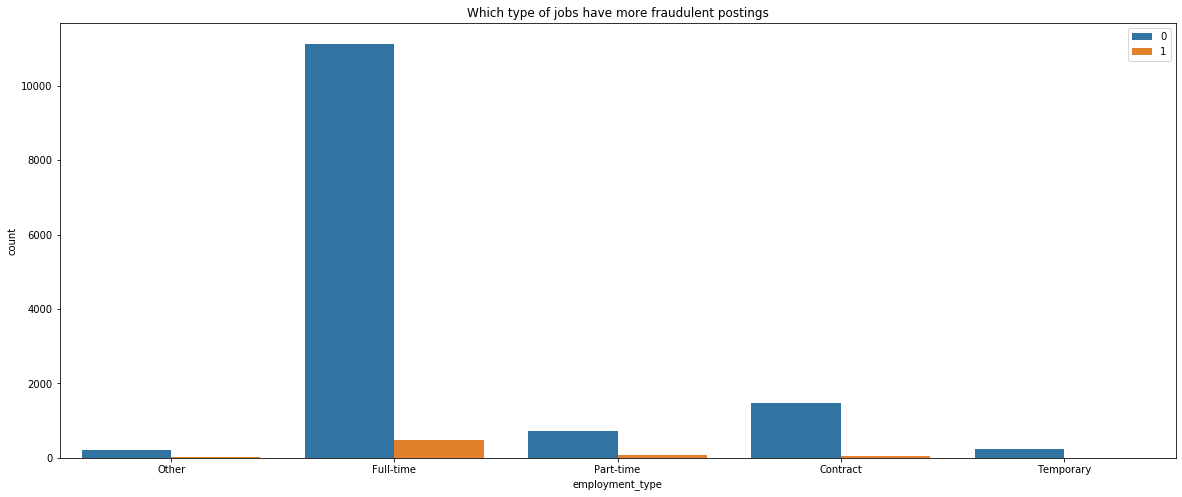

In [13]:
#Employment type on job post fraud
plt.figure(1,figsize=(20,8))
sb.countplot(hue=dataset.fraudulent,x=dataset.employment_type)
plt.legend(loc='upper right')
plt.title('Which type of jobs have more fraudulent postings')

'''By observing the count plot of the employment type we can make a conclusion that expect of employment
 type full time there is no other types that contribute to the fraudulent job post.'''
 

'The mid senior level work exprience job posting have more fraudulent job post then any other'

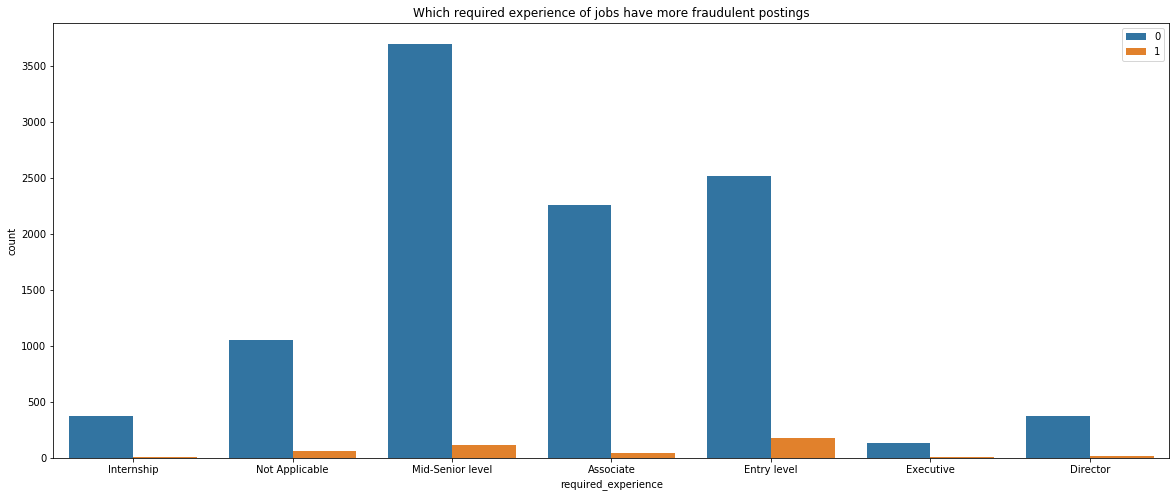

In [14]:
#Required Experience on job post fraud
plt.figure(1,figsize=(20,8))
sb.countplot(hue=dataset.fraudulent,x=dataset.required_experience)
plt.legend(loc='upper right')
plt.title('Which required experience of jobs have more fraudulent postings')

'''The mid senior level work exprience job posting have more fraudulent job post then any other'''


'We can see in the plot that the job post which have education requirement \nas bachelors degree contribute more to the fraudulent post'

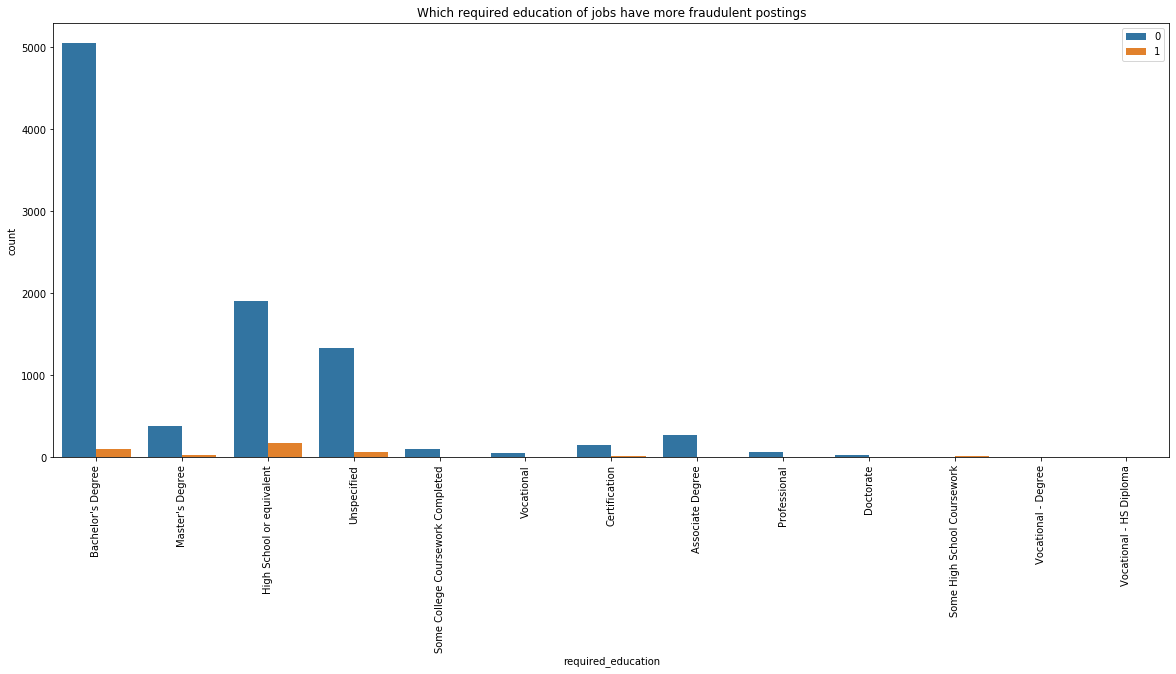

In [15]:
#Required Education on job post fraud
plt.figure(1,figsize=(20,8))
plt.xticks(rotation='90')
sb.countplot(hue=dataset.fraudulent,x=dataset.required_education)
plt.legend(loc='upper right')
plt.title('Which required education of jobs have more fraudulent postings')

'''We can see in the plot that the job post which have education requirement 
as bachelors degree contribute more to the fraudulent post'''


'For the non telecomunicating position there is fraudulent post then the telecomunicating position.'

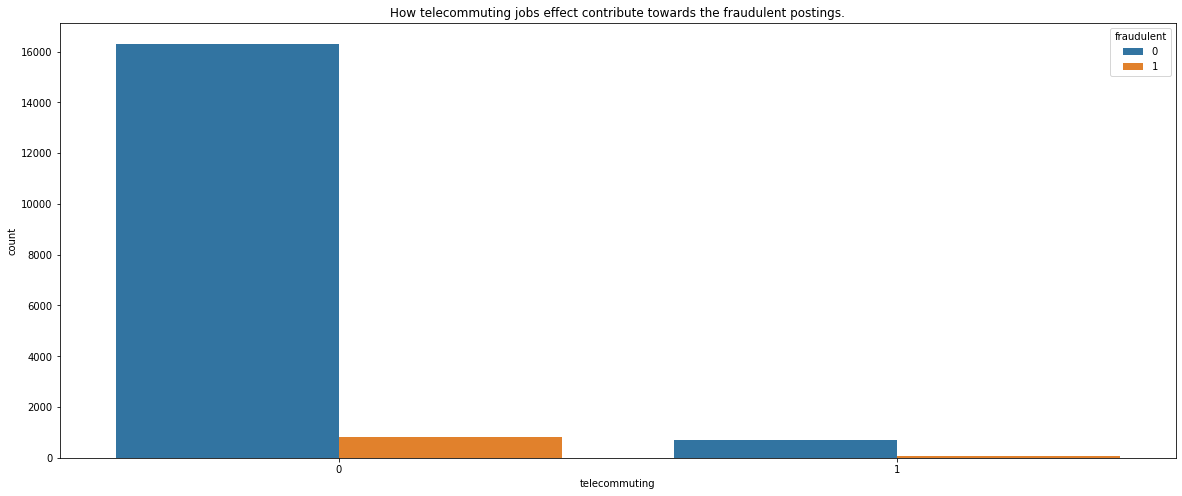

In [17]:
#Telecommuting Education on job post fraud
plt.figure(1,figsize=(20,8))
sb.countplot(hue=dataset.fraudulent,x=dataset.telecommuting)
plt.title('How telecommuting jobs effect contribute towards the fraudulent postings.')

'''For the non telecomunicating position there is fraudulent post then the telecomunicating position.''' 

'For the non telecomunicating position there is fraudulent post then the telecomunicating position.'

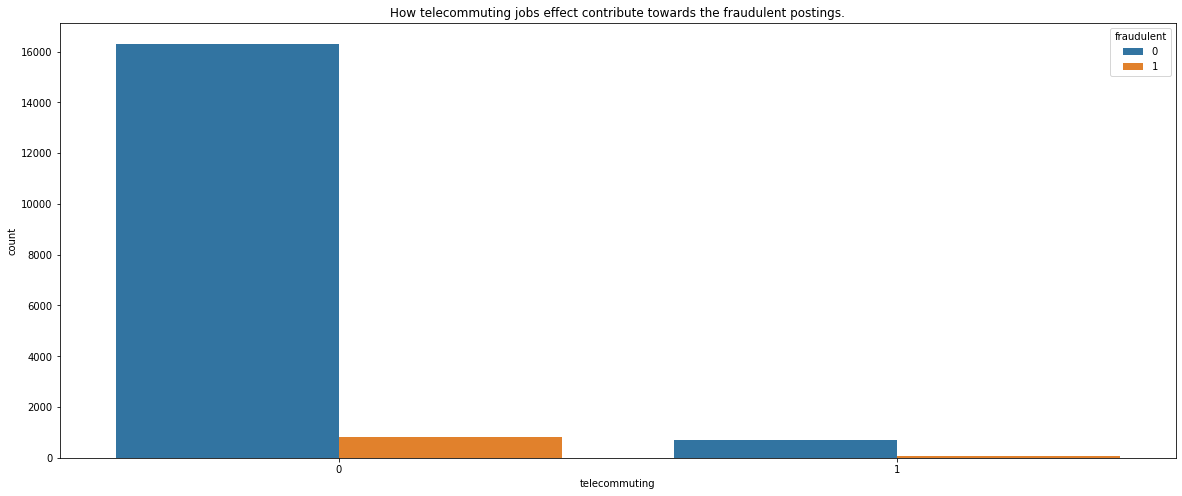

In [18]:
#Telecommuting Education on job post fraud
plt.figure(1,figsize=(20,8))
sb.countplot(hue=dataset.fraudulent,x=dataset.telecommuting)
plt.title('How telecommuting jobs effect contribute towards the fraudulent postings.')

'''For the non telecomunicating position there is fraudulent post then the telecomunicating position.'''


'Job post which have the company logo in it has less number of faudulent casses \nthen the one which do not have the company logo which is like a natural thing to see.'

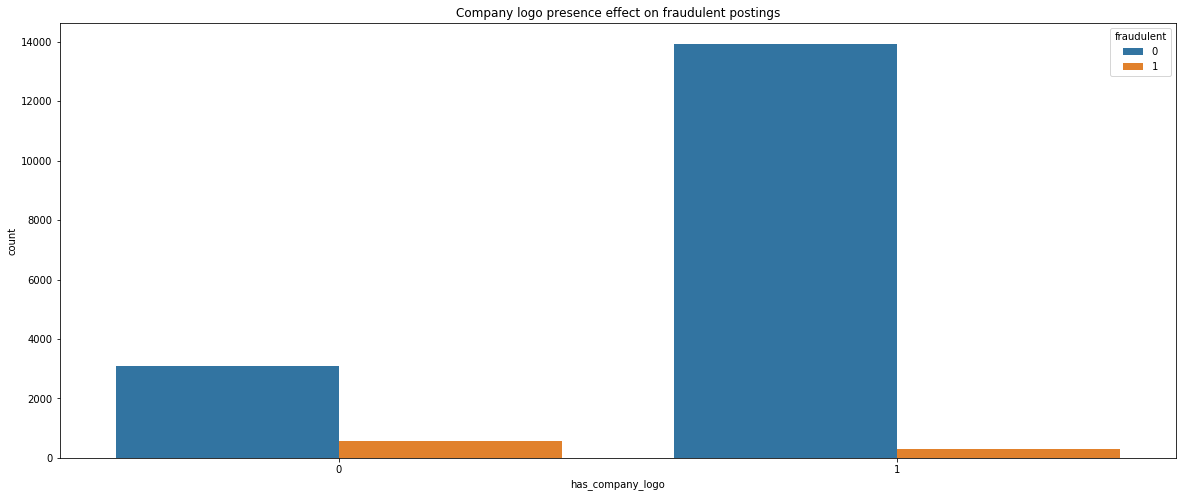

In [19]:
#Presence of company logo on job post on fraud post
plt.figure(1,figsize=(20,8))
sb.countplot(hue=dataset.fraudulent,x=dataset.has_company_logo)
plt.title('Company logo presence effect on fraudulent postings')

'''Job post which have the company logo in it has less number of faudulent casses 
then the one which do not have the company logo which is like a natural thing to see.'''


'We can see that is the screening questions are present then \nthere is less number of fraudulent job compare to the job posting where not screening questions are present.'

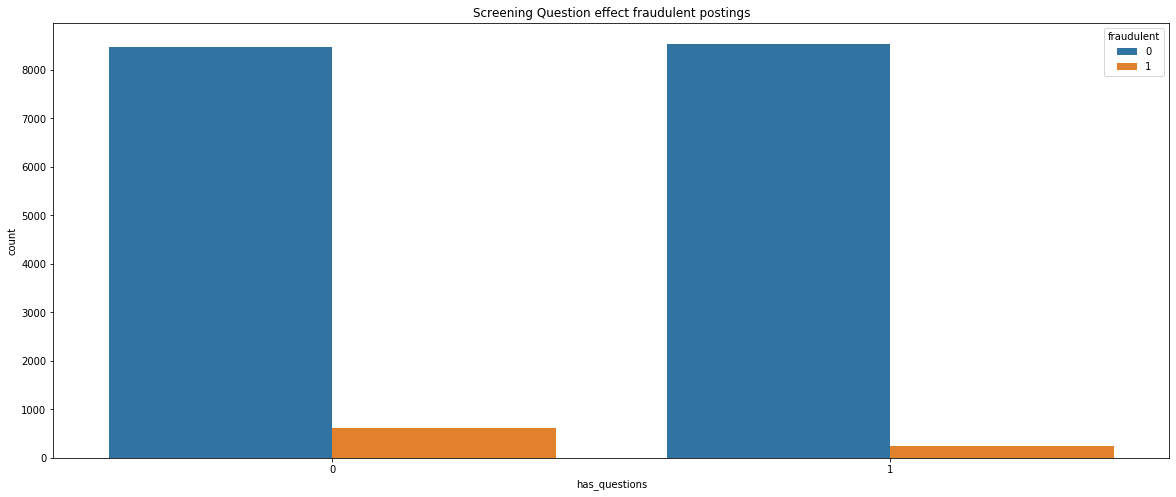

In [20]:
#Presence of screening question on job post fraud
plt.figure(1,figsize=(20,8))
sb.countplot(hue=dataset.fraudulent,x=dataset.has_questions)
plt.title('Screening Question effect fraudulent postings')

'''We can see that is the screening questions are present then 
there is less number of fraudulent job compare to the job posting where not screening questions are present.'''


'we can see Administrative, Engineering functions have more fraudulent posts from other job functions.'

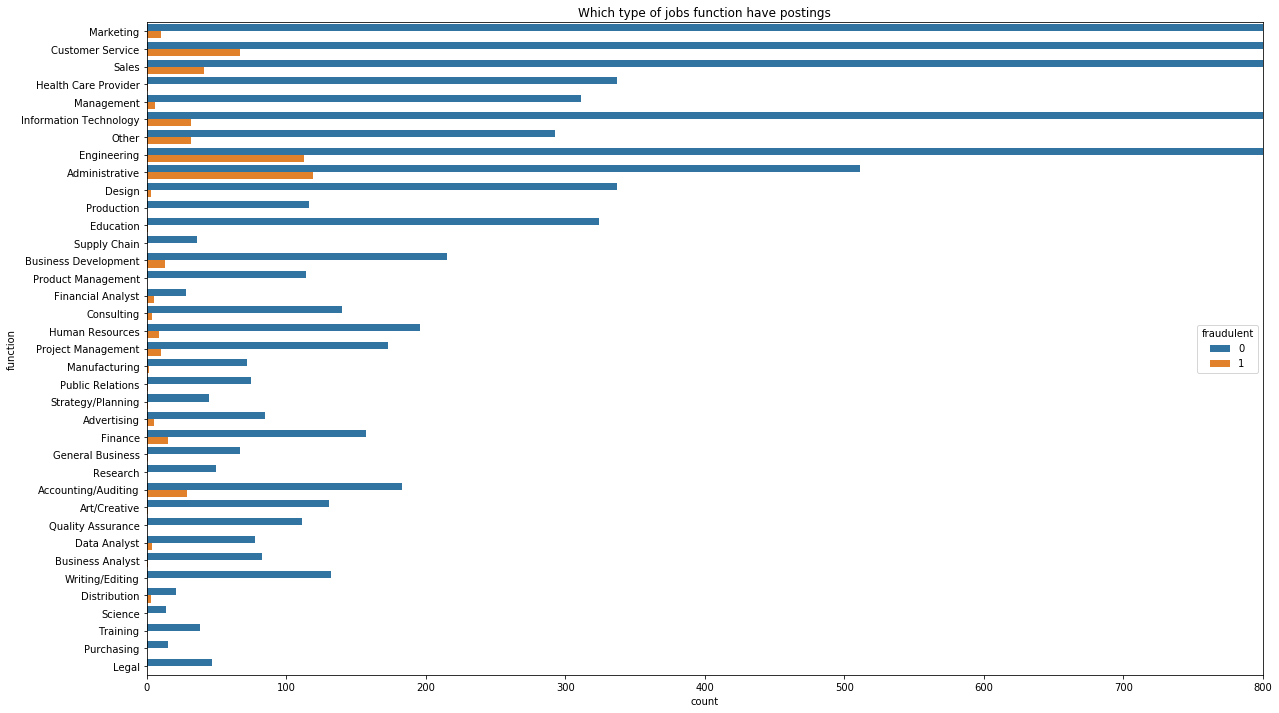

In [21]:
#Jobs function on fraudulent post
plt.figure(1,figsize=(20,12))
sb.countplot(y=dataset.function,hue=dataset.fraudulent);
plt.title('Which type of jobs function have postings');
plt.xlim(0,800)

'''we can see Administrative, Engineering functions have more fraudulent posts from other job functions.'''


In [7]:
##For categorical value
data_fraud = dataset.loc[dataset['fraudulent']==0]
data_fraud.isnull().sum()
data_fraud = data_fraud.dropna()

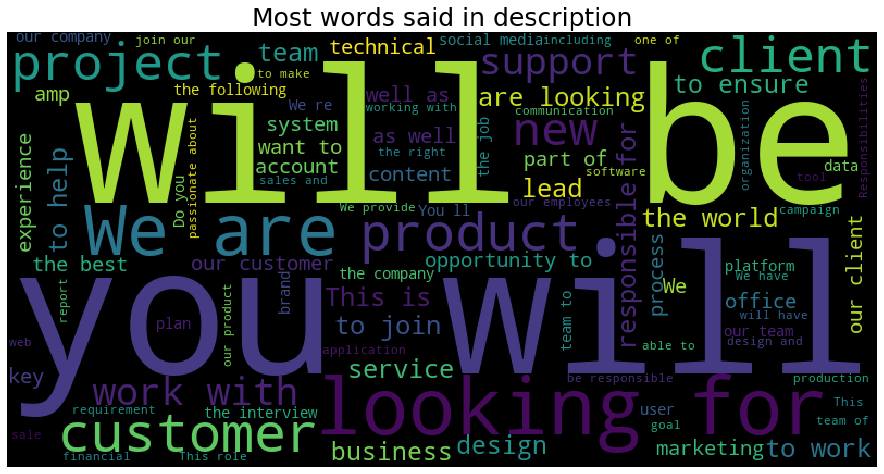

In [8]:
## Wordcloud of most said words in Description for Fraudulent cases
from wordcloud import WordCloud, STOPWORDS
stopwords = STOPWORDS
wordcloud = WordCloud (width=800, height=400, stopwords=stopwords,
                       min_font_size=10, max_words=200).generate(' '.join(data_fraud['description']))
plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most words said in description", fontsize=25)
plt.show()

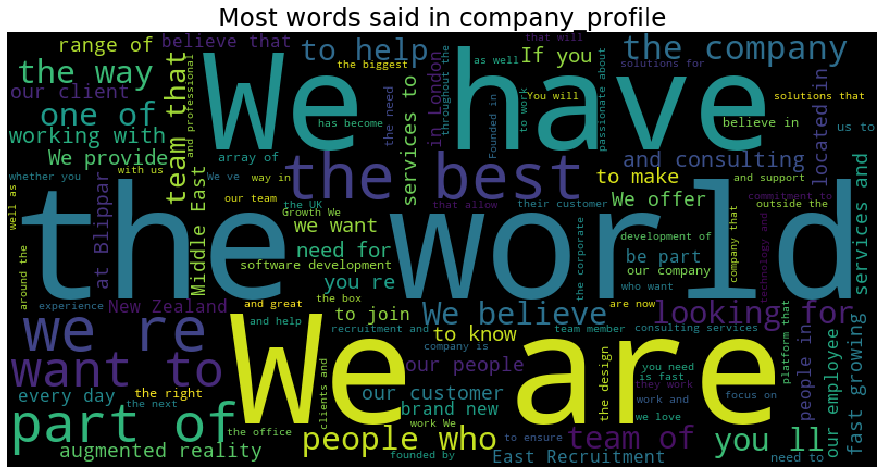

In [24]:
## Wordcloud of most said words in company_profile for Fraudulent cases
from wordcloud import WordCloud, STOPWORDS
stopwords = STOPWORDS
wordcloud = WordCloud (width=800, height=400, stopwords=stopwords,
                       min_font_size=10, max_words=200).generate(' '.join(data_fraud['company_profile']))
plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most words said in company_profile", fontsize=25)
plt.show()

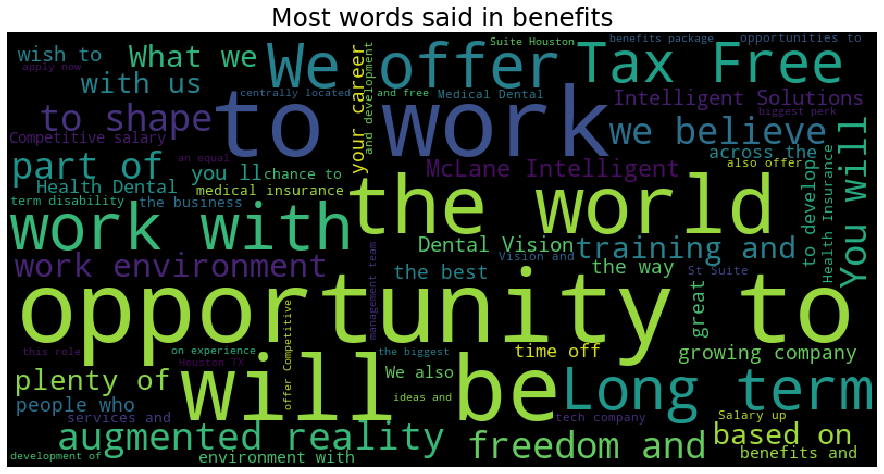

In [25]:
## Wordcloud of most said words in Benifits for Fraudulent cases
from wordcloud import WordCloud, STOPWORDS
stopwords = STOPWORDS
wordcloud = WordCloud (width=800, height=400, stopwords=stopwords,
                       min_font_size=10, max_words=200).generate(' '.join(data_fraud['benefits']))
plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most words said in benefits", fontsize=25)
plt.show()

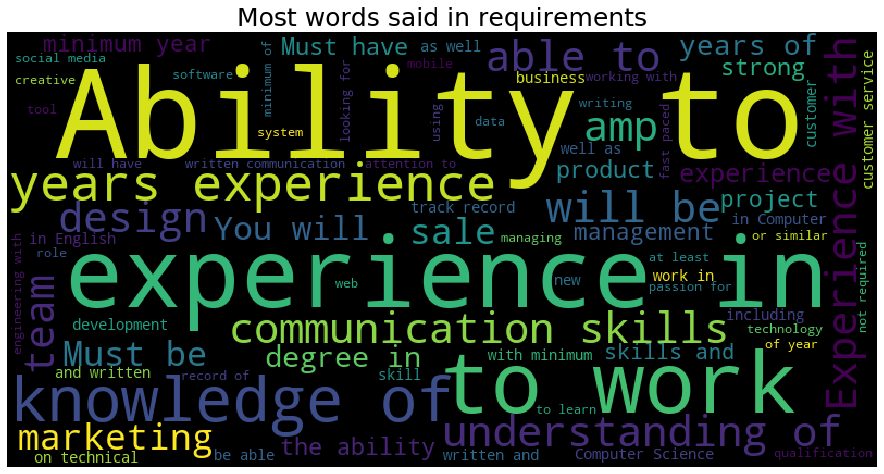

In [26]:
## Wordcloud of most said words in requirements for Fraudulent cases
from wordcloud import WordCloud, STOPWORDS
stopwords = STOPWORDS
wordcloud = WordCloud (width=800, height=400, stopwords=stopwords,
                       min_font_size=10, max_words=200).generate(' '.join(data_fraud['requirements']))
plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most words said in requirements", fontsize=25)
plt.show()

## Categorical Variable

In [6]:
#Data Preprocessing for categorical variable

#Feature selection
data_chat = dataset
'''job_id has a very low correlation with the data and salary_range 
has to many null values so we will remove these columns, for further analysis'''
data_chat=data_chat.drop("salary_range",axis=1)
data_chat=data_chat.drop("job_id",axis=1)

In [7]:
#Filling the null values with space for all columns
data_chat.fillna(" ",inplace = True)

In [8]:
#Creating a single paragraph for NLP analysis, by merging all categorical columns to a single column and named as a company_description
data_chat['company_description'] = data_chat['title'] + ' ' + data_chat['location'] + ' ' + data_chat['department'] + ' ' + data_chat['company_profile'] + ' ' 
+ data_chat['description'] + ' ' + data_chat['requirements'] + ' ' + data_chat['benefits'] + ' ' + data_chat['employment_type'] + ' ' 
+ data_chat['required_education'] + ' ' + data_chat['industry'] + ' ' + data_chat['function']


0                                                Marketing
1               Marketing and Advertising Customer Service
2                                                         
3                Bachelor's Degree Computer Software Sales
4        Bachelor's Degree Hospital & Health Care Healt...
                               ...                        
17875                              Computer Software Sales
17876       Bachelor's Degree Internet Accounting/Auditing
17877                                                     
17878                   Professional Graphic Design Design
17879                        Computer Software Engineering
Length: 17880, dtype: object

In [9]:
data_chat=data_chat.drop("title",axis=1)
data_chat=data_chat.drop("location",axis=1)
data_chat=data_chat.drop("department",axis=1)
data_chat=data_chat.drop("company_profile",axis=1)
data_chat=data_chat.drop("description",axis=1)
data_chat=data_chat.drop("requirements",axis=1)
data_chat=data_chat.drop("benefits",axis=1)
data_chat=data_chat.drop("employment_type",axis=1)
data_chat=data_chat.drop("required_experience",axis=1)
data_chat=data_chat.drop("required_education",axis=1)
data_chat=data_chat.drop("industry",axis=1)
data_chat=data_chat.drop("function",axis=1)

In [10]:
#Cleaning Data

data_chat['company_description']= data_chat['company_description'].str.replace(r'[^\w\s]+', '')

In [11]:
#Tokenize Data and Normalize Data
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
def split_into_tokens(fake):
    fake = str(fake.encode('utf8'))#converts byts into proper unicode
    return TextBlob(fake).words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sasim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sasim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
#original text
data_chat.company_description.head()

0    Marketing Intern US NY New York Marketing Were...
1    Customer Service  Cloud Video Production NZ  A...
2    Commissioning Machinery Assistant CMA US IA We...
3    Account Executive  Washington DC US DC Washing...
4    Bill Review Manager US FL Fort Worth   SpotSou...
Name: company_description, dtype: object

In [13]:
#Tokenized text
data_chat.company_description.head().apply(split_into_tokens)

0    [b'Marketing, Intern, US, NY, New, York, Marke...
1    [b'Customer, Service, Cloud, Video, Production...
2    [b'Commissioning, Machinery, Assistant, CMA, U...
3    [b'Account, Executive, Washington, DC, US, DC,...
4    [b'Bill, Review, Manager, US, FL, Fort, Worth,...
Name: company_description, dtype: object

In [14]:
# Normalized data in their base form
def split_into_lemmas(fraud):
    fraud = str(fraud.encode('utf8')).lower()
    words = TextBlob(fraud).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words]

data_chat.company_description.head().apply(split_into_lemmas)

0    [b'marketing, intern, u, ny, new, york, market...
1    [b'customer, service, cloud, video, production...
2    [b'commissioning, machinery, assistant, cma, u...
3    [b'account, executive, washington, dc, u, dc, ...
4    [b'bill, review, manager, u, fl, fort, worth, ...
Name: company_description, dtype: object

In [15]:
#splitting dataset into Training and test 
x= data_chat['company_description'].values
y=data_chat['fraudulent'].to_numpy()

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [17]:
#CountVectorizer & TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [18]:
#CountVectorizer
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
x_train_CV=cv.fit_transform(x_train)
x_test_CV=cv.transform(x_test)


In [19]:
# TfidfVectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
x_train_TV=tv.fit_transform(x_train)
x_test_TV=tv.transform(x_test)


## Classification Models

### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='l2',C = 1.0,random_state = 0,
                                solver='sag', multi_class='ovr')
#For CV
log_reg.fit(x_train_CV, y_train)
# Predicting the Test set results
y_pred_log_CV = log_reg.predict(x_test_CV)

C:\Users\sasim\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [21]:
# Making the Confusion Matrix & Accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
acc_log_CV = accuracy_score(y_test, y_pred_log_CV)
con = confusion_matrix(y_test, y_pred_log_CV)
# Making the Classification_report
cla = classification_report(y_test, y_pred_log_CV,target_names = ['0','1'])
print(acc_log_CV, con,cla )

0.9572706935123042 [[4273    0]
 [ 191    6]]               precision    recall  f1-score   support

           0       0.96      1.00      0.98      4273
           1       1.00      0.03      0.06       197

    accuracy                           0.96      4470
   macro avg       0.98      0.52      0.52      4470
weighted avg       0.96      0.96      0.94      4470



In [22]:
#For TV
log_reg.fit(x_train_TV, y_train)
# Predicting the Test set results
y_pred_log_TV = log_reg.predict(x_test_TV)

In [23]:
# Making the Confusion Matrix
confusion_matrix(y_test, y_pred_log_TV)
acc_log_TV = accuracy_score(y_test, y_pred_log_TV)
# Making the Classification_report
classification_report_TV_log = classification_report(y_test, y_pred_log_TV,target_names = ['0','1'])
print(acc_log_TV,classification_report_TV_log, confusion_matrix)

0.9559284116331096               precision    recall  f1-score   support

           0       0.96      1.00      0.98      4273
           1       0.00      0.00      0.00       197

    accuracy                           0.96      4470
   macro avg       0.48      0.50      0.49      4470
weighted avg       0.91      0.96      0.93      4470
 <function confusion_matrix at 0x000002676E6B83A8>


C:\Users\sasim\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Knearest neighbor

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski', p=2)
#For Cv
knn.fit(x_train_CV, y_train)
y_pred_knn_CV = knn.predict(x_test_CV)

In [25]:
# Making the Confusion Matrix & Accuracy& Classification report
acc_knn_CV = accuracy_score(y_test, y_pred_knn_CV)
conf = confusion_matrix(y_test, y_pred_log_TV)
# Making the Classification_report
classification_report_CV_knn = classification_report(y_test, y_pred_knn_CV,target_names = ['0','1'])
print(acc_knn_CV, conf, classification_report_CV_knn)

0.9559284116331096 [[4273    0]
 [ 197    0]]               precision    recall  f1-score   support

           0       0.96      1.00      0.98      4273
           1       0.00      0.00      0.00       197

    accuracy                           0.96      4470
   macro avg       0.48      0.50      0.49      4470
weighted avg       0.91      0.96      0.93      4470



C:\Users\sasim\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
#For Tv
knn.fit(x_train_TV, y_train)
y_pred_knn_TV = knn.predict(x_test_TV)

In [27]:
# Making the Confusion Matrix & Accuracy& Classification report
co = confusion_matrix(y_test, y_pred_knn_TV)
acc_knn_TV = accuracy_score(y_test, y_pred_knn_TV)
# Making the Classification_report
classification_report_TV_knn = classification_report(y_test, y_pred_knn_TV,target_names = ['0','1'])
print(acc_knn_TV, co, classification_report_TV_knn)

0.9563758389261745 [[4273    0]
 [ 195    2]]               precision    recall  f1-score   support

           0       0.96      1.00      0.98      4273
           1       1.00      0.01      0.02       197

    accuracy                           0.96      4470
   macro avg       0.98      0.51      0.50      4470
weighted avg       0.96      0.96      0.94      4470



### Naive bayes

In [28]:
from sklearn.naive_bayes import MultinomialNB
NB= MultinomialNB()
#for CV
NB.fit(x_train_CV, y_train)
y_pred_NB_CV = NB.predict(x_test_CV)

In [29]:
# Making the Confusion Matrix & Accuracy& Classification report
confu = confusion_matrix(y_test, y_pred_NB_CV)
acc_NB_CV = accuracy_score(y_test, y_pred_NB_CV)
classification_report_CV_NB = classification_report(y_test, y_pred_NB_CV,target_names = ['0','1'])
print(acc_NB_CV, confu, classification_report_CV_NB)

0.9630872483221476 [[4268    5]
 [ 160   37]]               precision    recall  f1-score   support

           0       0.96      1.00      0.98      4273
           1       0.88      0.19      0.31       197

    accuracy                           0.96      4470
   macro avg       0.92      0.59      0.65      4470
weighted avg       0.96      0.96      0.95      4470



In [30]:
#for TV
NB.fit(x_train_TV, y_train)
y_pred_NB_TV = NB.predict(x_test_TV)

In [31]:
# Making the Confusion Matrix & Accuracy& Classification report
confu_tv = confusion_matrix(y_test, y_pred_NB_TV)
acc_NB_TV = accuracy_score(y_test, y_pred_NB_TV)
classification_report_TV_NB = classification_report(y_test, y_pred_NB_TV,target_names = ['0','1'])
print(acc_NB_TV, confu_tv, classification_report_TV_NB)

0.9557046979865772 [[4271    2]
 [ 196    1]]               precision    recall  f1-score   support

           0       0.96      1.00      0.98      4273
           1       0.33      0.01      0.01       197

    accuracy                           0.96      4470
   macro avg       0.64      0.50      0.49      4470
weighted avg       0.93      0.96      0.93      4470



#### Decision Tree_entropy

In [32]:
from sklearn.tree import DecisionTreeClassifier
DT_ent= DecisionTreeClassifier(criterion='entropy')
# FOR CV
DT_ent.fit(x_train_CV, y_train)
y_pred_DT_ent_CV = DT_ent.predict(x_test_CV)

In [33]:
# Making the Confusion Matrix & Accuracy& Classification report
con = confusion_matrix(y_test, y_pred_DT_ent_CV)
acc_DT_entropy_CV = accuracy_score(y_test, y_pred_DT_ent_CV)
classification_report_CV_DT_ent = classification_report(y_test, y_pred_DT_ent_CV,target_names = ['0','1'])
print(acc_DT_entropy_CV, con, classification_report_CV_DT_ent)

0.9630872483221476 [[4258   15]
 [ 150   47]]               precision    recall  f1-score   support

           0       0.97      1.00      0.98      4273
           1       0.76      0.24      0.36       197

    accuracy                           0.96      4470
   macro avg       0.86      0.62      0.67      4470
weighted avg       0.96      0.96      0.95      4470



In [34]:
# FOR TV
DT_ent.fit(x_train_TV, y_train)
y_pred_DT_ent_TV = DT_ent.predict(x_test_TV)

In [35]:
# Making the Confusion Matrix & Accuracy& Classification report
con_tv = confusion_matrix(y_test, y_pred_DT_ent_TV)
acc_DT_entropy_TV = accuracy_score(y_test, y_pred_DT_ent_TV)
classification_report_TV_DT_ent = classification_report(y_test, y_pred_DT_ent_TV,target_names = ['0','1'])
print(acc_DT_entropy_TV, con_tv, classification_report_TV_DT_ent)

0.9646532438478748 [[4258   15]
 [ 143   54]]               precision    recall  f1-score   support

           0       0.97      1.00      0.98      4273
           1       0.78      0.27      0.41       197

    accuracy                           0.96      4470
   macro avg       0.88      0.64      0.69      4470
weighted avg       0.96      0.96      0.96      4470



#### Decision Tree_gini

In [36]:
from sklearn.tree import DecisionTreeClassifier
DT_gini= DecisionTreeClassifier(criterion='gini')
# FOR CV
DT_gini.fit(x_train_CV, y_train)

y_pred_DT_gini_CV = DT_gini.predict(x_test_CV)

In [37]:
# Making the Confusion Matrix & Accuracy& Classification report
c = confusion_matrix(y_test, y_pred_DT_gini_CV)
acc_DT_gini_CV = accuracy_score(y_test, y_pred_DT_gini_CV)
classification_report_CV_DT_gini = classification_report(y_test, y_pred_DT_gini_CV,target_names = ['0','1'])
print(acc_DT_gini_CV, c, classification_report_CV_DT_gini)

0.963758389261745 [[4254   19]
 [ 143   54]]               precision    recall  f1-score   support

           0       0.97      1.00      0.98      4273
           1       0.74      0.27      0.40       197

    accuracy                           0.96      4470
   macro avg       0.85      0.63      0.69      4470
weighted avg       0.96      0.96      0.96      4470



In [38]:
# FOR TV
DT_gini.fit(x_train_TV, y_train)
y_pred_DT_gini_TV = DT_gini.predict(x_test_TV)

In [39]:
# Making the Confusion Matrix & Accuracy& Classification report
c_tv = confusion_matrix(y_test, y_pred_DT_gini_TV)
acc_DT_gini_TV = accuracy_score(y_test, y_pred_DT_gini_TV)
classification_report_TV_DT_gini = classification_report(y_test, y_pred_DT_gini_TV,target_names = ['0','1'])
print(acc_DT_gini_TV, c_tv, classification_report_TV_DT_gini)

0.96331096196868 [[4261   12]
 [ 152   45]]               precision    recall  f1-score   support

           0       0.97      1.00      0.98      4273
           1       0.79      0.23      0.35       197

    accuracy                           0.96      4470
   macro avg       0.88      0.61      0.67      4470
weighted avg       0.96      0.96      0.95      4470



### Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
RF_E = RandomForestClassifier(n_estimators=10,criterion='entropy')

#For CV
RF_E.fit(x_train_CV,y_train)

y_pred_RF_E_CV = RF_E.predict(x_test_CV)

In [61]:
confus = confusion_matrix(y_test, y_pred_RF_E_CV)
acc_RF_E_CV = accuracy_score(y_test, y_pred_RF_E_CV)
classification_report_CV_RF = classification_report(y_test, y_pred_RF_E_CV,target_names = ['0','1'])
print(acc_RF_E_CV , confus, classification_report_CV_RF)

0.96331096196868 [[4266    7]
 [ 157   40]]               precision    recall  f1-score   support

           0       0.96      1.00      0.98      4273
           1       0.85      0.20      0.33       197

    accuracy                           0.96      4470
   macro avg       0.91      0.60      0.65      4470
weighted avg       0.96      0.96      0.95      4470



In [62]:
#For TV
RF_E.fit(x_train_TV,y_train)
y_pred_RF_E_TV = RF_E.predict(x_test_TV)

In [63]:
confus_tv = confusion_matrix(y_test, y_pred_RF_E_TV)
acc_RF_E_TV = accuracy_score(y_test, y_pred_RF_E_TV)
classification_report_TV_RF_E = classification_report(y_test, y_pred_RF_E_TV,target_names = ['0','1'])
print(acc_RF_E_TV , confus_tv, classification_report_TV_RF_E)

0.9615212527964205 [[4265    8]
 [ 164   33]]               precision    recall  f1-score   support

           0       0.96      1.00      0.98      4273
           1       0.80      0.17      0.28       197

    accuracy                           0.96      4470
   macro avg       0.88      0.58      0.63      4470
weighted avg       0.96      0.96      0.95      4470



In [64]:
#Random Forest_gini
from sklearn.ensemble import RandomForestClassifier
RF_G = RandomForestClassifier(n_estimators=10,criterion='gini')
#For CV
RF_G.fit(x_train_CV,y_train)
y_pred_RF_G_CV = RF_G.predict(x_test_CV)

In [65]:
confusion = confusion_matrix(y_test, y_pred_RF_G_CV)
acc_RF_G_CV = accuracy_score(y_test, y_pred_RF_G_CV)
classification_report_CV_RF_G = classification_report(y_test, y_pred_RF_G_CV,target_names = ['0','1'])
print(acc_RF_G_CV , confusion, classification_report_CV_RF_G)

0.962192393736018 [[4265    8]
 [ 161   36]]               precision    recall  f1-score   support

           0       0.96      1.00      0.98      4273
           1       0.82      0.18      0.30       197

    accuracy                           0.96      4470
   macro avg       0.89      0.59      0.64      4470
weighted avg       0.96      0.96      0.95      4470



In [66]:
#For TV
RF_G.fit(x_train_TV,y_train)
y_pred_RF_G_TV = RF_G.predict(x_test_TV)

In [67]:
confusion_tv = confusion_matrix(y_test, y_pred_RF_G_TV)
acc_RF_G_TV = accuracy_score(y_test, y_pred_RF_G_TV)
classification_report_TV_RF_G = classification_report(y_test, y_pred_RF_G_TV,target_names = ['0','1'])
print(acc_RF_G_TV , confusion_tv, classification_report_TV_RF_G)

0.9626398210290827 [[4266    7]
 [ 160   37]]               precision    recall  f1-score   support

           0       0.96      1.00      0.98      4273
           1       0.84      0.19      0.31       197

    accuracy                           0.96      4470
   macro avg       0.90      0.59      0.64      4470
weighted avg       0.96      0.96      0.95      4470



In [68]:
#XGBOOSTING
from xgboost import XGBClassifier
model=XGBClassifier()
#for CV
model.fit(x_train_CV,y_train)
#Prediction
y_pred_XGB_CV = model.predict(x_test_CV)

In [71]:
# Making the Confusion Matrix & Accuracy& Classification report
confusion_xg = confusion_matrix(y_test, y_pred_XGB_CV)
acc_XGB_CV = accuracy_score(y_test, y_pred_XGB_CV)
classification_report_XGB_CV = classification_report(y_test,y_pred_XGB_CV,target_names = ['0','1'])
print(acc_XGB_CV, confusion_xg, classification_report_XGB_CV)

0.9559284116331096 [[4273    0]
 [ 197    0]]               precision    recall  f1-score   support

           0       0.96      1.00      0.98      4273
           1       0.00      0.00      0.00       197

    accuracy                           0.96      4470
   macro avg       0.48      0.50      0.49      4470
weighted avg       0.91      0.96      0.93      4470



In [74]:
#For TV
model.fit(x_train_TV,y_train)
#Prediction
y_pred_XGB_TV = model.predict(x_test_TV)

In [75]:
# Making the Confusion Matrix & Accuracy& Classification report
confusion_xg_tv = confusion_matrix(y_test, y_pred_XGB_TV)
acc_XGB_TV = accuracy_score(y_test, y_pred_XGB_TV)
classification_report_XGB_TV = classification_report(y_test,y_pred_XGB_TV,target_names = ['0','1'])
print(acc_XGB_TV, confusion_xg_tv, classification_report_XGB_TV)

0.9559284116331096 [[4273    0]
 [ 197    0]]               precision    recall  f1-score   support

           0       0.96      1.00      0.98      4273
           1       0.00      0.00      0.00       197

    accuracy                           0.96      4470
   macro avg       0.48      0.50      0.49      4470
weighted avg       0.91      0.96      0.93      4470



In [ ]:
#Comparing the accuracy

In [40]:
#for cv
accuracy_cv={'KNN':(acc_knn_CV*100),'XGB_CV':(acc_XGB_CV*100), 'Log_reg':(acc_log_CV*100),'Ran_For_G':(acc_RF_G_CV*100),'NB':(acc_NB_CV*100),
             'Ran_For_E':(acc_RF_E_CV*100),'DT GINI':(acc_DT_gini_CV*100),'DT Entropy':(acc_DT_entropy_CV*100)}
print(accuracy_cv)

{'KNN': 95.59284116331096, 'Log_reg': 95.72706935123043, 'NB': 96.30872483221476, 'DT GINI': 96.3758389261745, 'DT Entropy': 96.30872483221476}


In [90]:
#for TV
accuracy_tv={'NB':(acc_NB_TV*100), 'Log_reg':(acc_log_TV*100),'XGB_TV':(acc_XGB_TV*100), 'KNN':(acc_knn_TV*100), 'Ran_For_E':(acc_RF_E_TV*100),
             'Ran_for_G':(acc_RF_G_TV*100), 'DT Entropy':(acc_DT_entropy_TV*100), 'DT GINI':(acc_DT_gini_TV*100)}
print(accuracy_tv)

{'NB': 95.57046979865773, 'Log_reg': 95.59284116331096, 'XGB_TV': 95.59284116331096, 'KNN': 95.63758389261746, 'Ran_For_E': 96.15212527964205, 'Ran_for_G': 96.26398210290827, 'DT Entropy': 96.30872483221476, 'DT GINI': 96.42058165548099}


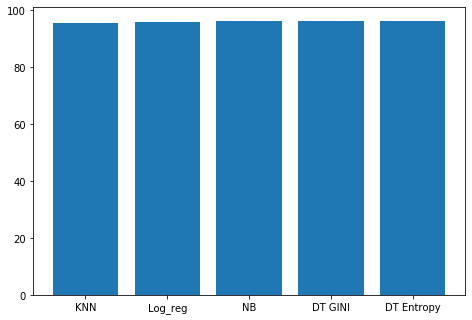

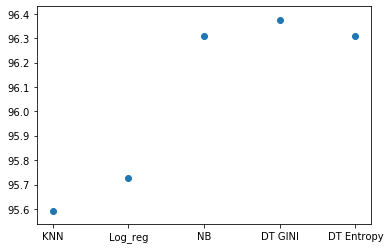

In [41]:
#CV
#Bar
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.bar(accuracy_cv.keys(),accuracy_cv.values())
plt.show()
#Scatter
plt.scatter(accuracy_cv.keys(),accuracy_cv.values()) 
plt.show()

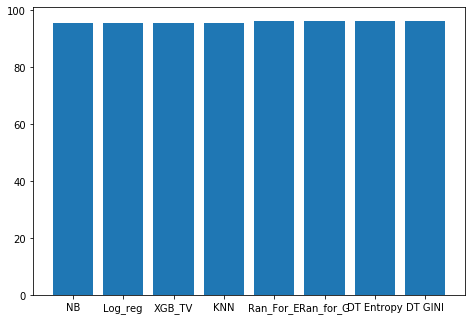

In [93]:
#TV
#bar
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(accuracy_tv.keys(),accuracy_tv.values())
plt.show()
#scatter
plt.scatter(accuracy_tv.keys(),accuracy_tv.values()) 
plt.show()

# For Numerical(Emphirical) Variable

In [42]:
data_num = dataset

In [43]:
#Data Preprocessing & Feature selection
data_num['employment_type'].value_counts()
data_num['department'].value_counts()
data_num['required_experience'].value_counts()
data_num['required_education'].value_counts()
data_num['industry'].value_counts()
data_num['function'].value_counts()

Information Technology    1749
Sales                     1468
Engineering               1348
Customer Service          1229
Marketing                  830
Administrative             630
Design                     340
Health Care Provider       338
Education                  325
Other                      325
Management                 317
Business Development       228
Accounting/Auditing        212
Human Resources            205
Project Management         183
Finance                    172
Consulting                 144
Art/Creative               132
Writing/Editing            132
Production                 116
Product Management         114
Quality Assurance          111
Advertising                 90
Business Analyst            84
Data Analyst                82
Public Relations            76
Manufacturing               74
General Business            68
Research                    50
Legal                       47
Strategy/Planning           46
Training                    38
Supply C

In [44]:
#Get dummies and store it in a variable
Job = pd.get_dummies(data_num['employment_type'])
Job=Job.drop("Contract",axis=1)

experience = pd.get_dummies(data_num['required_experience'])
experience=experience.drop("Associate",axis=1)

education = pd.get_dummies(data_num['required_education'])
education=education.drop("Unspecified",axis=1)

In [45]:
# Remove chategorical columns
data_num=data_num.drop("job_id",axis=1)
data_num=data_num.drop("title",axis=1)
data_num=data_num.drop("location",axis=1)
data_num=data_num.drop("department",axis=1)
data_num=data_num.drop("company_profile",axis=1)
data_num=data_num.drop("description",axis=1)
data_num=data_num.drop("requirements",axis=1)
data_num=data_num.drop("benefits",axis=1)
data_num=data_num.drop("employment_type",axis=1)
data_num=data_num.drop("required_experience",axis=1)
data_num=data_num.drop("required_education",axis=1)
data_num=data_num.drop("industry",axis=1)
data_num=data_num.drop("function",axis=1)

data_num = pd.concat([data_num, Job, experience, education], axis = 1)

In [46]:
#Splitting of SalaryRange
data_num['salary_min'] = data_num['salary_range'][data_num['salary_range'].notnull()].apply(lambda x :x.split('-')[0])
data_num['salary_max'] = data_num['salary_range'][data_num['salary_range'].notnull()].apply(lambda x :x.split('-')[-1])
data_num['salary_min'] = pd.to_numeric(data_num['salary_min'], errors='coerce').fillna("0")
data_num['salary_max'] = pd.to_numeric(data_num['salary_max'], errors='coerce').fillna("0")

data_num = data_num.drop("salary_range",axis=1)

In [47]:
#X & Y variable
y = data_num['fraudulent'].to_numpy()

data_num  = data_num.drop("fraudulent",axis=1)

x = data_num

In [48]:
# Training & Test 
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [49]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Fitting Classification Models to the Training set

### Logistic Regression 

In [50]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='l2',C = 1.0,random_state = 0,
                                solver='sag', multi_class='ovr')
log_reg.fit(x_train, y_train)

# Predicting the Test set results
y_pred_log = log_reg.predict(x_test)

C:\Users\sasim\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [52]:
# Making the Confusion Matrix & Accuracy& Classification report
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
log = confusion_matrix(y_test, y_pred_log)
acc_log = accuracy_score(y_test, y_pred_log)
classification_report_log = classification_report(y_test,y_pred_log,target_names = ['0','1'])
print( acc_log, log, classification_report_log)

[[4272    1]
 [ 191    6]] 0.9570469798657718               precision    recall  f1-score   support

           0       0.96      1.00      0.98      4273
           1       0.86      0.03      0.06       197

    accuracy                           0.96      4470
   macro avg       0.91      0.52      0.52      4470
weighted avg       0.95      0.96      0.94      4470



### Knearest neighbor

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,
                        metric='minkowski', p=2)

knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

In [54]:
# Making the Confusion Matrix & Accuracy& Classification report
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
KNN = confusion_matrix(y_test, y_pred_knn)
acc_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test,y_pred_knn,target_names = ['0','1'])
print( acc_knn, KNN, classification_report_knn)

0.9572706935123042 [[4236   37]
 [ 154   43]]               precision    recall  f1-score   support

           0       0.96      0.99      0.98      4273
           1       0.54      0.22      0.31       197

    accuracy                           0.96      4470
   macro avg       0.75      0.60      0.64      4470
weighted avg       0.95      0.96      0.95      4470



### Naive bayes

In [55]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

NB.fit(x_train, y_train)
y_pred_NB = NB.predict(x_test)

In [56]:
# Making the Confusion Matrix & Accuracy& Classification report
NB = confusion_matrix(y_test, y_pred_knn)
acc_NB = accuracy_score(y_test, y_pred_NB)
classification_report_NB = classification_report(y_test,y_pred_NB,target_names = ['0','1'])
print( acc_NB, NB, classification_report_NB)

0.08120805369127516 [[4236   37]
 [ 154   43]]               precision    recall  f1-score   support

           0       0.97      0.04      0.08      4273
           1       0.04      0.97      0.09       197

    accuracy                           0.08      4470
   macro avg       0.51      0.51      0.08      4470
weighted avg       0.93      0.08      0.08      4470



### Decision Tree_Entropy

In [58]:
from sklearn.tree import DecisionTreeClassifier
DT_E= DecisionTreeClassifier(criterion='entropy')

DT_E.fit(x_train, y_train)

y_pred_DT_E = DT_E.predict(x_test)

In [60]:
# Making the Confusion Matrix & Accuracy& Classification report
DT_E = confusion_matrix(y_test, y_pred_DT_E)
acc_DT_E = accuracy_score(y_test, y_pred_DT_E)
classification_report_DT_E = classification_report(y_test,y_pred_DT_E,target_names = ['0','1'])
print( acc_DT_E, DT_E, classification_report_DT_E)

0.9577181208053691 [[4235   38]
 [ 151   46]]               precision    recall  f1-score   support

           0       0.97      0.99      0.98      4273
           1       0.55      0.23      0.33       197

    accuracy                           0.96      4470
   macro avg       0.76      0.61      0.65      4470
weighted avg       0.95      0.96      0.95      4470



### Decision Tree_gini

In [61]:
from sklearn.tree import DecisionTreeClassifier
DT_G= DecisionTreeClassifier(criterion='gini')

DT_G.fit(x_train, y_train)

y_pred_DT_G = DT_G.predict(x_test)

In [62]:
# Making the Confusion Matrix & Accuracy& Classification report
DT_G =confusion_matrix(y_test, y_pred_DT_G)
acc_DT_G = accuracy_score(y_test, y_pred_DT_G)
classification_report_DT_G = classification_report(y_test,y_pred_DT_G,target_names = ['0','1'])
print( acc_DT_G, DT_G, classification_report_DT_G)

0.9572706935123042 [[4232   41]
 [ 150   47]]               precision    recall  f1-score   support

           0       0.97      0.99      0.98      4273
           1       0.53      0.24      0.33       197

    accuracy                           0.96      4470
   macro avg       0.75      0.61      0.65      4470
weighted avg       0.95      0.96      0.95      4470



### Random Forest entropy

In [63]:
from sklearn.ensemble import RandomForestClassifier

RF_E = RandomForestClassifier(n_estimators=10,
                                    criterion='entropy')
RF_E.fit(x_train,y_train)
y_pred_RF_E = RF_E.predict(x_test)

In [64]:
# Making the Confusion Matrix & Accuracy& Classification report
RF_E = confusion_matrix(y_test, y_pred_RF_E)
acc_RF_E = accuracy_score(y_test, y_pred_RF_E)
classification_report_RF_E = classification_report(y_test,y_pred_RF_E,target_names = ['0','1'])
print( acc_RF_E, RF_E, classification_report_RF_E)

0.9577181208053691 [[4237   36]
 [ 153   44]]               precision    recall  f1-score   support

           0       0.97      0.99      0.98      4273
           1       0.55      0.22      0.32       197

    accuracy                           0.96      4470
   macro avg       0.76      0.61      0.65      4470
weighted avg       0.95      0.96      0.95      4470



### Random Forest gini

In [65]:
from sklearn.ensemble import RandomForestClassifier

RF_G = RandomForestClassifier(n_estimators=10,
                                    criterion='gini')
RF_G.fit(x_train,y_train)
y_pred_RF_G = RF_G.predict(x_test)

In [66]:
# Making the Confusion Matrix & Accuracy& Classification report
RF_G = confusion_matrix(y_test, y_pred_RF_G)
acc_RF_G = accuracy_score(y_test, y_pred_RF_G)
classification_report_RF_G = classification_report(y_test,y_pred_RF_G,target_names = ['0','1'])
print( acc_RF_G, RF_G, classification_report_RF_G)

0.9572706935123042 [[4237   36]
 [ 155   42]]               precision    recall  f1-score   support

           0       0.96      0.99      0.98      4273
           1       0.54      0.21      0.31       197

    accuracy                           0.96      4470
   macro avg       0.75      0.60      0.64      4470
weighted avg       0.95      0.96      0.95      4470



### XGBOOSTING

In [67]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x_train,y_train)
#Prediction
y_pred_XGB=model.predict(x_test)

In [68]:
# Making the Confusion Matrix & Accuracy& Classification report
XGB = confusion_matrix(y_test, y_pred_XGB)
acc_XGB = accuracy_score(y_test, y_pred_XGB)
classification_report_XGB = classification_report(y_test,y_pred_XGB,target_names = ['0','1'])
print( acc_XGB, XGB, classification_report_XGB)

0.9615212527964205 [[4256   17]
 [ 155   42]]               precision    recall  f1-score   support

           0       0.96      1.00      0.98      4273
           1       0.71      0.21      0.33       197

    accuracy                           0.96      4470
   macro avg       0.84      0.60      0.65      4470
weighted avg       0.95      0.96      0.95      4470



In [ ]:
### Support Vector Machine

In [69]:
##SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)
# Predicting the Test set results
y_pred_SVM = classifier.predict(x_test)

In [70]:
# Making the Confusion Matrix & Accuracy& Classification report
SVM = confusion_matrix(y_test, y_pred_SVM)
acc_SVM = accuracy_score(y_test, y_pred_SVM)
classification_report_SVM = classification_report(y_test,y_pred_SVM,target_names = ['0','1'])
print( acc_SVM, SVM, classification_report_SVM)

0.9583892617449664 [[4267    6]
 [ 180   17]]               precision    recall  f1-score   support

           0       0.96      1.00      0.98      4273
           1       0.74      0.09      0.15       197

    accuracy                           0.96      4470
   macro avg       0.85      0.54      0.57      4470
weighted avg       0.95      0.96      0.94      4470



### Artficial Neural Network

In [73]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout



classifier = Sequential()

classifier.add(Dense(units=8,kernel_initializer='uniform',activation='relu',input_dim=27))

classifier.add(Dense(units=8,kernel_initializer='uniform',activation='relu'))

classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [74]:
classifier.fit(x_train,y_train, batch_size=27, epochs=50)

y_pred = classifier.predict(x_test)

y_pred_ANN = (y_pred>0.5)

Epoch 1/50
497/497 [==============================] - 1s 1ms/step - loss: 0.2874 - accuracy: 0.9501
Epoch 2/50
497/497 [==============================] - 0s 884us/step - loss: 0.1611 - accuracy: 0.9501
Epoch 3/50
497/497 [==============================] - 0s 869us/step - loss: 0.1573 - accuracy: 0.9501
Epoch 4/50
497/497 [==============================] - 0s 807us/step - loss: 0.1548 - accuracy: 0.9501
Epoch 5/50
497/497 [==============================] - 0s 849us/step - loss: 0.1529 - accuracy: 0.9501
Epoch 6/50
497/497 [==============================] - 0s 820us/step - loss: 0.1520 - accuracy: 0.9501
Epoch 7/50
497/497 [==============================] - 0s 863us/step - loss: 0.1507 - accuracy: 0.9501
Epoch 8/50
497/497 [==============================] - 0s 775us/step - loss: 0.1499 - accuracy: 0.9501
Epoch 9/50
497/497 [==============================] - 0s 813us/step - loss: 0.1493 - accuracy: 0.9501
Epoch 10/50
497/497 [==============================] - 0s 783us/step - loss: 0.1484 

In [75]:
# Making the Confusion Matrix & Accuracy& Classification report
ANN = confusion_matrix(y_test, y_pred_ANN)
acc_ANN = accuracy_score(y_test, y_pred_ANN)
classification_report_ANN = classification_report(y_test,y_pred_ANN,target_names = ['0','1'])
print( acc_ANN, ANN, classification_report_ANN)

0.9586129753914989 [[4265    8]
 [ 177   20]]               precision    recall  f1-score   support

           0       0.96      1.00      0.98      4273
           1       0.71      0.10      0.18       197

    accuracy                           0.96      4470
   macro avg       0.84      0.55      0.58      4470
weighted avg       0.95      0.96      0.94      4470



In [ ]:
#Comparing the accuracy

In [80]:
accuracy={'Log_reg':(acc_log*100),'DT GINI':(acc_DT_G*100), 'KNN':(acc_knn*100), 'Ran_For_G':(acc_RF_G*100),
          'DT Entropy':(acc_DT_E*100), 'Ran_For_E':(acc_RF_E*100),"SVM":(acc_SVM*100),"ANN":(acc_ANN*100),'XGB':(acc_XGB*100)}
print(accuracy)

{'Log_reg': 95.70469798657719, 'DT GINI': 95.72706935123043, 'KNN': 95.72706935123043, 'Ran_For_G': 95.72706935123043, 'DT Entropy': 95.7718120805369, 'Ran_For_E': 95.7718120805369, 'SVM': 95.83892617449663, 'ANN': 95.86129753914989, 'XGB': 96.15212527964205}


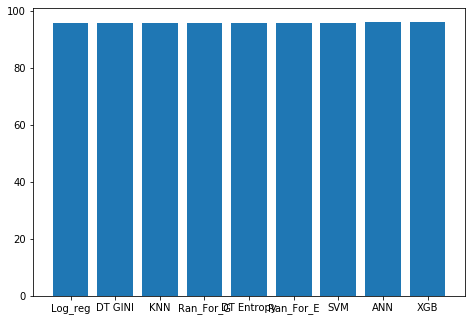

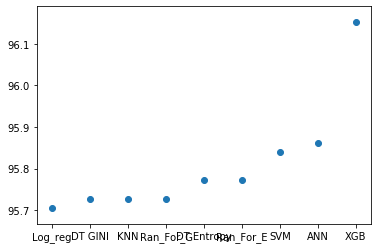

In [81]:
#Bar
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(accuracy.keys(),accuracy.values())
plt.show()
#Scatter
plt.scatter(accuracy.keys(),accuracy.values()) 
plt.show()

                                      fpr                               tpr  \
models                                                                        
LR      [0.0, 0.0002340276152586005, 1.0]  [0.0, 0.030456852791878174, 1.0]   
KNN      [0.0, 0.008659021764568219, 1.0]    [0.0, 0.2182741116751269, 1.0]   
NB         [0.0, 0.9599812777907794, 1.0]    [0.0, 0.9746192893401016, 1.0]   
DT_E      [0.0, 0.00889304937982682, 1.0]     [0.0, 0.233502538071066, 1.0]   
DT_G     [0.0, 0.009595132225602621, 1.0]   [0.0, 0.23857868020304568, 1.0]   
RF_E     [0.0, 0.008424994149309618, 1.0]    [0.0, 0.2233502538071066, 1.0]   
RF_G     [0.0, 0.008424994149309618, 1.0]    [0.0, 0.2131979695431472, 1.0]   
XGB      [0.0, 0.003978469459396209, 1.0]    [0.0, 0.2131979695431472, 1.0]   
SVM      [0.0, 0.001404165691551603, 1.0]   [0.0, 0.08629441624365482, 1.0]   
ANN      [0.0, 0.001872220922068804, 1.0]   [0.0, 0.10152284263959391, 1.0]   

             auc  
models            
LR      0.515

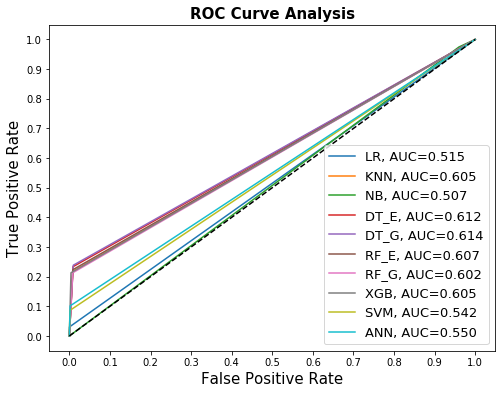

In [83]:
from sklearn.metrics import roc_curve, roc_auc_score

results_table = pd.DataFrame(columns = ['models', 'fpr','tpr','auc'])

predictions = {'LR': y_pred_log, 'KNN': y_pred_knn, 'NB': y_pred_NB, 'DT_E': y_pred_DT_E, 'DT_G': y_pred_DT_G, 
               'RF_E': y_pred_RF_E, 'RF_G': y_pred_RF_G, 'XGB': y_pred_XGB, 'SVM': y_pred_SVM, 'ANN': y_pred_ANN}

for key in predictions:
    fpr, tpr, _ = roc_curve(y_test, predictions[key])
    auc = roc_auc_score(y_test, predictions[key])
    
    results_table = results_table.append({'models': key,
                                         'fpr' : fpr,
                                         'tpr' : tpr,
                                         'auc' : auc}, ignore_index=True)
    
results_table.set_index('models', inplace=True)

print(results_table)

fig = plt.figure(figsize = (8,6))

for i in results_table.index:
    plt.plot(results_table.loc[i]['fpr'], 
             results_table.loc[i]['tpr'], 
             label = "{}, AUC={:.3f}".format(i, results_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color = 'black', linestyle = '--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop = {'size':13}, loc = 'lower right')


plt.show()


### PCA

In [85]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
PCA=scale.fit_transform(x)
PCA=pd.DataFrame(PCA)
dataset.columns
PCA.columns=x.columns
new_PCA=pd.concat([x,PCA],axis=1)

In [86]:
#train test split
from sklearn.model_selection import train_test_split
x_train_pca, x_test_pca,y_train_pca,y_test_pca = train_test_split(new_PCA,y,test_size = 0.25, random_state = 100)

In [87]:
from sklearn.decomposition import PCA
pca=PCA()

In [88]:
x_train_pca=pca.fit_transform(x_train_pca)
x_test_pca=pca.transform(x_test_pca)
explained_ratio=pca.explained_variance_ratio_

In [89]:
np.cumsum(explained_ratio)#cumulative sum out of 54 features up 1 features its 95 percent so we can remove other 
#but column name is not order

array([0.99977051, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [90]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)

In [91]:
x_train_pca=pca.fit_transform(x_train_pca)
x_test_pca=pca.transform(x_test_pca)
explained_ratio=pca.explained_variance_ratio_
print(explained_ratio)

[9.99770513e-01 2.29487429e-04 9.75341269e-15 7.58098519e-15
 7.15684577e-15 5.86822018e-15 5.51683852e-15 5.46234563e-15
 5.17014883e-15 4.93590367e-15]


In [92]:
np.cumsum(explained_ratio)

array([0.99977051, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

#### Since XGB shows higher accuracy and Decision tree_ginni was better in ROC AUC curve

In [94]:
from sklearn.tree import DecisionTreeClassifier
DT_G= DecisionTreeClassifier(criterion='gini')

DT_G.fit(x_train_pca, y_train_pca)

y_pred_DT_G_pca = DT_G.predict(x_test_pca)

In [99]:
# Making the Confusion Matrix & Accuracy& Classification report
DT_G_pca =confusion_matrix(y_test_pca, y_pred_DT_G_pca)
acc_DT_G_pca = accuracy_score(y_test_pca, y_pred_DT_G_pca)
classification_report_DT_G_pca = classification_report(y_test_pca,y_pred_DT_G_pca,target_names = ['0','1'])
print( acc_DT_G_pca, DT_G_pca, classification_report_DT_G_pca)

0.9353467561521253 [[4136  104]
 [ 185   45]]               precision    recall  f1-score   support

           0       0.96      0.98      0.97      4240
           1       0.30      0.20      0.24       230

    accuracy                           0.94      4470
   macro avg       0.63      0.59      0.60      4470
weighted avg       0.92      0.94      0.93      4470



In [100]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x_train_pca,y_train_pca)
#Prediction
y_pred_XGB_pca=model.predict(x_test_pca)

In [101]:
# Making the Confusion Matrix & Accuracy& Classification report
XGB_pca = confusion_matrix(y_test_pca, y_pred_XGB_pca)
acc_XGB_pca = accuracy_score(y_test_pca, y_pred_XGB_pca)
classification_report_XGB_pca = classification_report(y_test_pca,y_pred_XGB_pca,target_names = ['0','1'])
print( acc_XGB_pca, XGB_pca, classification_report_XGB_pca)

0.9534675615212528 [[4231    9]
 [ 199   31]]               precision    recall  f1-score   support

           0       0.96      1.00      0.98      4240
           1       0.78      0.13      0.23       230

    accuracy                           0.95      4470
   macro avg       0.87      0.57      0.60      4470
weighted avg       0.95      0.95      0.94      4470

